### **MODELING**

Since we've been able to properly segment different properties of documents. The next part is to build the model that will be responsible for recognising individual characters.
**Deep Learning** will be used to classify the images into 75 different groups based on their diacritics. 
The classes for this model are quite much, so we are further going to make try implementing **multi-label classification** and then compare results.

Since our total dataset contains just 41 samples for each class. This might be a negative pull down for deep learning models since they are always data hungry.

**Training data** = 38 samples for each class(**Total = *2850**)

**Testing data** = 3 samples for each class(**Total = 2850**)

In [14]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')

In [15]:
path = Path('/home/max/Pictures/data')

In [16]:
data = ImageDataBunch.from_folder(path, train='train', ds_tfms=get_transforms(do_flip = False), valid='test', size=28, bs=64).normalize(imagenet_stats)

In [17]:
data.one_batch()[0].size()

torch.Size([64, 3, 28, 28])

**MODEL ARCHITECTURE (RESNET34)**

In [18]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])

**Model still need to train for estimately 20 more epochs.. More accuracy can be attained**

**Error_rate** also tells more about the how well the algorithm doing... The closer it is to 0, the better

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,5.576880,3.563106,0.188596,0.811404,05:03
1,3.897155,1.873373,0.552632,0.447368,04:38
2,2.586220,1.137084,0.706140,0.293860,04:42
3,1.699794,0.639620,0.828947,0.171053,04:38
4,1.222318,0.549132,0.855263,0.144737,04:40
5,0.888521,0.584083,0.842105,0.157895,05:12
6,0.666014,0.448548,0.885965,0.114035,04:50
7,0.520978,0.387462,0.912281,0.087719,04:42
8,0.413957,0.336818,0.916667,0.083333,04:33
9,0.373595,0.338297,0.925439,0.074561,04:38


In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

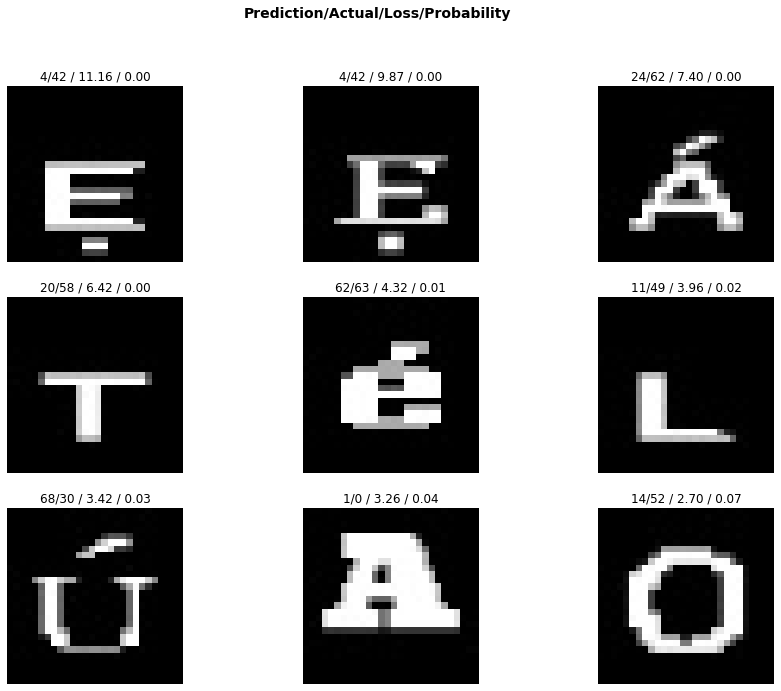

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

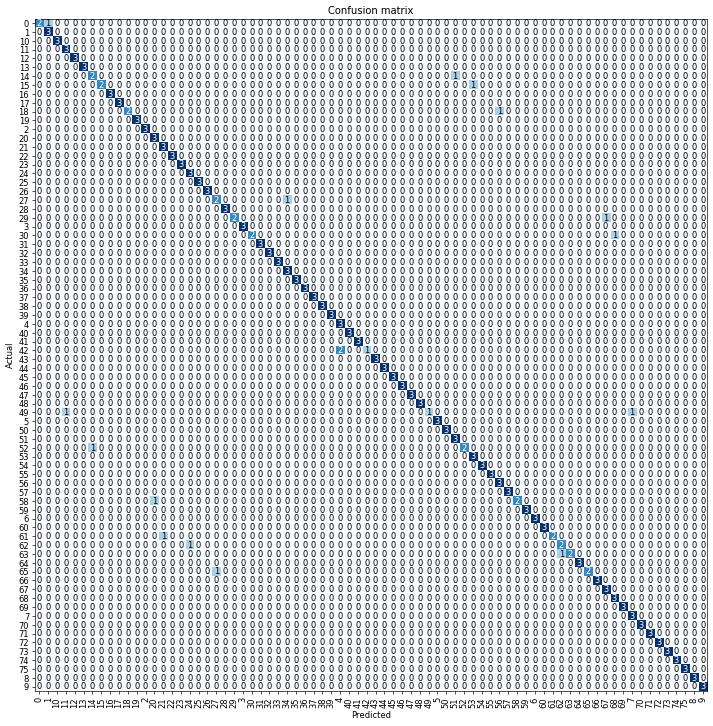

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)